In [2]:
# ============================================================
# 📦 Installation et gestion des versions
# ============================================================
!pip install tensorflow==2.16.1 numpy==1.26.4 matplotlib==3.9.0

# Imports
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Vérification des versions
print("✅ TensorFlow version:", tf.__version__)
print("✅ NumPy version:", np.__version__)
print("✅ Matplotlib version:", matplotlib.__version__)



✅ TensorFlow version: 2.16.1
✅ NumPy version: 1.26.4
✅ Matplotlib version: 3.9.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Taille du jeu d'entraînement : (60000, 28, 28, 1)
Taille du jeu de test : (10000, 28, 28, 1)


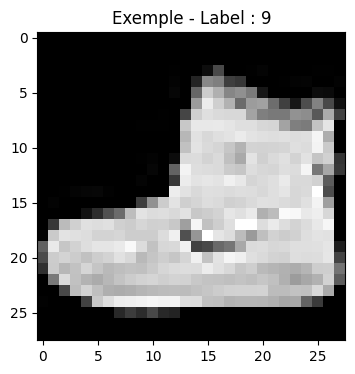

In [3]:
# ============================================================
# 1️⃣ Charger et normaliser les images Fashion-MNIST
# ============================================================
from tensorflow.keras.datasets import fashion_mnist

# Charger le jeu de données
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalisation des pixels (0-255) -> (0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionner pour le CNN : (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Vérification
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)

# Affichage d’un échantillon
plt.figure(figsize=(4,4))
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(f"Exemple - Label : {y_train[0]}")
plt.show()


In [4]:
# ============================================================
# 2️⃣ Création d’un CNN simple : Conv -> Pool -> Dense
# ============================================================
from tensorflow.keras import models, layers

# Définition du modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Résumé du modèle
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.7292 - loss: 0.7637 - val_accuracy: 0.8537 - val_loss: 0.4010
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.8681 - loss: 0.3652 - val_accuracy: 0.8843 - val_loss: 0.3154
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8885 - loss: 0.3061 - val_accuracy: 0.8933 - val_loss: 0.2876
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9017 - loss: 0.2726 - val_accuracy: 0.8995 - val_loss: 0.2745
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9084 - loss: 0.2484 - val_accuracy: 0.9022 - val_loss: 0.2669


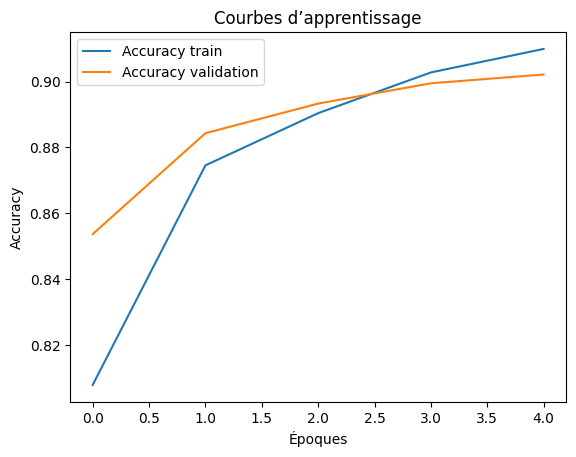

In [5]:
# ============================================================
# 3️⃣ Compilation et entraînement du modèle
# ============================================================
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement (sur petit nombre d’époques)
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=64)

# Affichage de la courbe d’entraînement
plt.plot(history.history['accuracy'], label='Accuracy train')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title("Courbes d’apprentissage")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8965 - loss: 0.2889
✅ Précision sur le jeu de test : 0.90
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


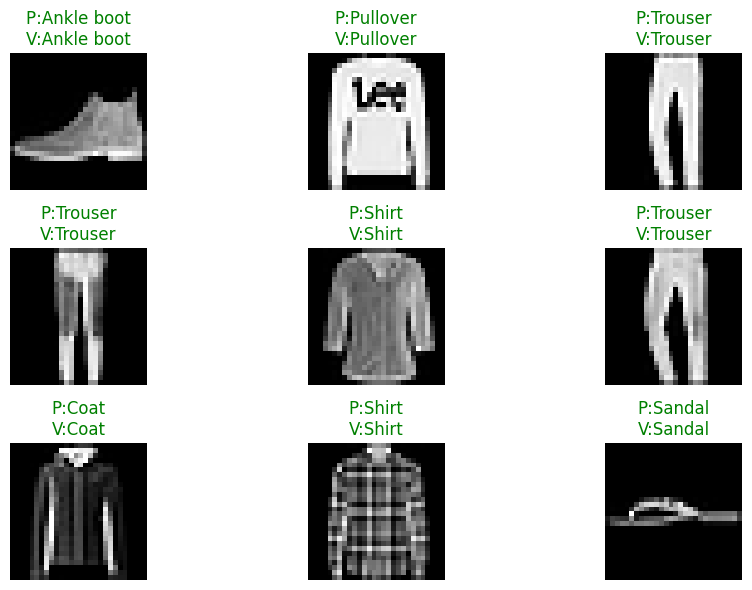

In [6]:
# ============================================================
# 4️⃣ Évaluer accuracy sur test et afficher quelques prédictions
# ============================================================

# Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Précision sur le jeu de test : {test_acc:.2f}")

# Prédictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Liste des classes du dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Afficher quelques exemples corrects / incorrects
plt.figure(figsize=(10, 6))
for i, idx in enumerate(range(9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    color = "green" if y_pred_classes[idx] == y_test[idx] else "red"
    plt.title(f"P:{class_names[y_pred_classes[idx]]}\nV:{class_names[y_test[idx]]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()
